In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import requests

In [4]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
data_filename = 'incidence-PAY-7.csv'

In [6]:
# On essaie de lire le fichier csv local si il existe, sinon on le telecharge
# de maniere a avoir une copie locale

try:
    raw_data = pd.read_csv(data_filename, skiprows=1)
except FileNotFoundError:
    req = requests.get(data_url)
    url_content = req.content
    csv_file = open(data_filename, 'wb')
    csv_file.write(url_content)
 
raw_data = pd.read_csv(data_filename, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202145          7  10708     7156   14260      16          11   
1     202144          7   8680     5343   12017      13           8   
2     202143          7   8164     5179   11149      12           7   
3     202142          7   9443     6037   12849      14           9   
4     202141          7   4021     2239    5803       6           3   
5     202140          7   4441     2454    6428       7           4   
6     202139          7   2291     1056    3526       3           1   
7     202138          7   4325     2267    6383       7           4   
8     202137          7   1964      754    3174       3           1   
9     202136          7   3441     1730    5152       5           2   
10    202135          7   2562     1107    4017       4           2   
11    202134          7   1429      378    2480       2           0   
12    202133          7   3829     1830    5828       6           3   
13    202132          7   4108     1895    6321       6           3   
14    202131          7   4793     2301    7285       7           3   
15    202130          7   7190     4191   10189      11           6   
16    202129          7   6800     4109    9491      10           6   
17    202128          7   9734        0   21731      15           0   
18    202127          7   9026     4316   13736      14           7   
19    202126          7   7284     4108   10460      11           6   
20    202125          7   9351     6540   12162      14          10   
21    202124          7  12034     8937   15131      18          13   
22    202123          7   9116     6420   11812      14          10   
23    202122          7   4817     2752    6882       7           4   
24    202121          7   6092     3458    8726       9           5   
25    202120          7   7485     4601   10369      11           7   
26    202119          7   6654     4370    8938      10           7   
27    202118          7   3912     2110    5714       6           3   
28    202117          7   4686     2878    6494       7           4   
29    202116          7   4780     2891    6669       7           4   
...      ...        ...    ...      ...     ...     ...         ...   
1585  199126          7  17608    11304   23912      31          20   
1586  199125          7  16169    10700   21638      28          18   
1587  199124          7  16171    10071   22271      28          17   
1588  199123          7  11947     7671   16223      21          13   
1589  199122          7  15452     9953   20951      27          17   
1590  199121          7  14903     8975   20831      26          16   
1591  199120          7  19053    12742   25364      34          23   
1592  199119          7  16739    11246   22232      29          19   
1593  199118          7  21385    13882   28888      38          25   
1594  199117          7  13462     8877   18047      24          16   
1595  199116          7  14857    10068   19646      26          18   
1596  199115          7  13975     9781   18169      25          18   
1597  199114          7  12265     7684   16846      22          14   
1598  199113          7   9567     6041   13093      17          11   
1599  199112          7  10864     7331   14397      19          13   
1600  199111          7  15574    11184   19964      27          19   
1601  199110          7  16643    11372   21914      29          20   
1602  199109          7  13741     8780   18702      24          15   
1603  199108          7  13289     8813   17765      23          15   
1604  199107          7  12337     8077   16597      22          15   
1605  199106          7  10877     7013   14741      19          12   
1606  199105          7  10442     6544   14340      18          11   
1607  199104          7   7913     4563   11263      14           8   
1608  199103          7  15387    10484   20290      27          18   
1609  199102          7  16277  

In [11]:
raw_data[raw_data.isnull().any(axis=1)]
# pas de données manquantes
data = raw_data

In [13]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [14]:
sorted_data = data.set_index('period').sort_index()

In [16]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

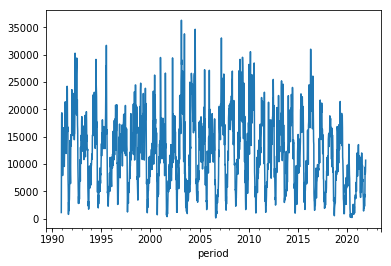

In [18]:
sorted_data['inc'].plot()

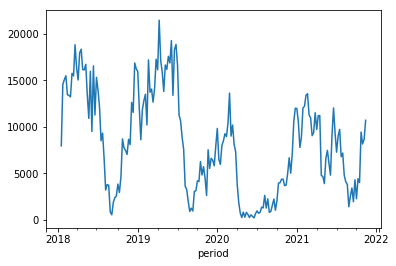

In [21]:
sorted_data['inc'][-200:].plot()

In [22]:
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202145          7  10708     7156   14260      16          11   
1     202144          7   8680     5343   12017      13           8   
2     202143          7   8164     5179   11149      12           7   
3     202142          7   9443     6037   12849      14           9   
4     202141          7   4021     2239    5803       6           3   
5     202140          7   4441     2454    6428       7           4   
6     202139          7   2291     1056    3526       3           1   
7     202138          7   4325     2267    6383       7           4   
8     202137          7   1964      754    3174       3           1   
9     202136          7   3441     1730    5152       5           2   
10    202135          7   2562     1107    4017       4           2   
11    202134          7   1429      378    2480       2           0   
12    202133          7   3829     1830    5828       6           3   
13    202132          7   4108     1895    6321       6           3   
14    202131          7   4793     2301    7285       7           3   
15    202130          7   7190     4191   10189      11           6   
16    202129          7   6800     4109    9491      10           6   
17    202128          7   9734        0   21731      15           0   
18    202127          7   9026     4316   13736      14           7   
19    202126          7   7284     4108   10460      11           6   
20    202125          7   9351     6540   12162      14          10   
21    202124          7  12034     8937   15131      18          13   
22    202123          7   9116     6420   11812      14          10   
23    202122          7   4817     2752    6882       7           4   
24    202121          7   6092     3458    8726       9           5   
25    202120          7   7485     4601   10369      11           7   
26    202119          7   6654     4370    8938      10           7   
27    202118          7   3912     2110    5714       6           3   
28    202117          7   4686     2878    6494       7           4   
29    202116          7   4780     2891    6669       7           4   
...      ...        ...    ...      ...     ...     ...         ...   
1585  199126          7  17608    11304   23912      31          20   
1586  199125          7  16169    10700   21638      28          18   
1587  199124          7  16171    10071   22271      28          17   
1588  199123          7  11947     7671   16223      21          13   
1589  199122          7  15452     9953   20951      27          17   
1590  199121          7  14903     8975   20831      26          16   
1591  199120          7  19053    12742   25364      34          23   
1592  199119          7  16739    11246   22232      29          19   
1593  199118          7  21385    13882   28888      38          25   
1594  199117          7  13462     8877   18047      24          16   
1595  199116          7  14857    10068   19646      26          18   
1596  199115          7  13975     9781   18169      25          18   
1597  199114          7  12265     7684   16846      22          14   
1598  199113          7   9567     6041   13093      17          11   
1599  199112          7  10864     7331   14397      19          13   
1600  199111          7  15574    11184   19964      27          19   
1601  199110          7  16643    11372   21914      29          20   
1602  199109          7  13741     8780   18702      24          15   
1603  199108          7  13289     8813   17765      23          15   
1604  199107          7  12337     8077   16597      22          15   
1605  199106          7  10877     7013   14741      19          12   
1606  199105          7  10442     6544   14340      18          11   
1607  199104          7   7913     4563   11263      14           8   
1608  199103          7  15387    10484   20290      27          18   
1609  199102          7  16277  

In [24]:
first_sep_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [27]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sep_week[:-1],
                        first_sep_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

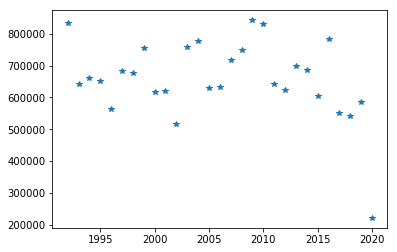

In [29]:
 yearly_incidence.plot(style='*')

In [30]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64